# Determining Which Aircrafts Offer Lower Risk To Business Stakeholders.

## Project Overview



1. A detailed findings of which aircraft  would offer lower risk to shareholders as they take in this new venture.
2. Cleaning the data to ensure they're no missing values.
3. Communicate insights using visualizations.



## Business Understanding

The goals for this project are:
* Analyze data from the National Transportation Safety Board from 1962 to 2023 that deal with aviation accidents.
* Find the shareholders  what aircrafts offer low risks  to invest in.
* Determine what aircrafts  offer high risks to the investors.
* Provide information to the head of new aviation division on which aircrafts the shareholders should purchase.


Once this goals are met we can identify which aircrafts are suitable for any stakeholder to invest in with minimal loss and projections for profit in the future in the aviation industry.

## Data Understanding

The data  comes from [Kaggle](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) which has information about aviation accidents from 1962 to 2023.

To load the dataset we use pandas library.

In [10]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("AviationData.csv",encoding= "latin-1",low_memory=False)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


The data contains 31 columns, from this data we should be able to identify aircrafts that offer high and low risks  to the  shareholders.


This data contains missing values so my first step is to clean this data.

In [13]:
#We can get information about this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [14]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [15]:
#create a boolean output 
df.isnull()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,...,False,True,False,True,True,True,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,True,True,True,False
88885,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
88886,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
88887,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,True,True,True,True


Rows that contain True indicate that there is missing values in that column.

In [17]:
# We can now get the number of missing values in the dataset
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

The only columns that don't contain missing values are Event.Id,Investigation.Type, Accident.Number and Event.Date

Since some of columns have large number of missing values we will drop the columns,such columns include:
* Air carrier
* Latitude
* Longitude
* FAR.Description

## Data Preparation

Here we can drop either rows or columns to deal with the missing values.

We drop missing values so that our analysis is not interfered with.

In [23]:
#drop column containing large number of missing values which include  Air.carrier,Latitude.
df=df.drop(["Air.carrier","Latitude","Longitude","FAR.Description","Schedule","Aircraft.Category","Airport.Code","Airport.Name","Amateur.Built"],axis=1)
df



,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,N1867H,PIPER,...,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,N2895Z,BELLANCA,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,...,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,N210CU,CESSNA,...,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


We can also drop column Broad.phase.of.flight and others


In [25]:
df=df.drop(["Broad.phase.of.flight","Publication.Date","Aircraft.damage","Engine.Type","Report.Status","Number.of.Engines","Registration.Number"],axis=1)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Stinson,108-3,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Piper,PA24-180,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Cessna,172M,Personal,3.0,NaN,NaN,NaN,IMC
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Rockwell,112,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Cessna,501,Personal,1.0,2.0,NaN,0.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,PIPER,PA-28-151,Personal,0.0,1.0,0.0,0.0,NaN
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,BELLANCA,7ECA,NaN,0.0,0.0,0.0,0.0,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,AMERICAN CHAMPION AIRCRAFT,8GCBC,Personal,0.0,0.0,0.0,1.0,VMC
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,CESSNA,210N,Personal,0.0,0.0,0.0,0.0,NaN


In [26]:
#check whether the columns have been dropped
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Make                         63
Model                        92
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
dtype: int64

Now we are going to  fill in the null values.

For categorical data we are going to replace with mode

In [29]:
#filling missing values for Purpose of flight
#We use inplace=True to make sure the changes occur in the dataset
df["Purpose.of.flight"].fillna(df["Purpose.of.flight"].mode()[0],inplace=True)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Stinson,108-3,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Piper,PA24-180,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Cessna,172M,Personal,3.0,NaN,NaN,NaN,IMC
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Rockwell,112,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Cessna,501,Personal,1.0,2.0,NaN,0.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,PIPER,PA-28-151,Personal,0.0,1.0,0.0,0.0,NaN
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,BELLANCA,7ECA,Personal,0.0,0.0,0.0,0.0,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,AMERICAN CHAMPION AIRCRAFT,8GCBC,Personal,0.0,0.0,0.0,1.0,VMC
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,CESSNA,210N,Personal,0.0,0.0,0.0,0.0,NaN


In [30]:
df["Injury.Severity"].fillna(df["Injury.Severity"].mode()[0],inplace=True)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Stinson,108-3,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Piper,PA24-180,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Cessna,172M,Personal,3.0,NaN,NaN,NaN,IMC
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Rockwell,112,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Cessna,501,Personal,1.0,2.0,NaN,0.0,VMC


We can drop rows for Location,Country,make and model since they've a low number of missing values.

In [32]:
#dropping rows containing missing values in location
df=df.dropna(subset=["Location"])
df


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Stinson,108-3,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Piper,PA24-180,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Cessna,172M,Personal,3.0,NaN,NaN,NaN,IMC
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Rockwell,112,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Cessna,501,Personal,1.0,2.0,NaN,0.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,PIPER,PA-28-151,Personal,0.0,1.0,0.0,0.0,NaN
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,Non-Fatal,BELLANCA,7ECA,Personal,0.0,0.0,0.0,0.0,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,AMERICAN CHAMPION AIRCRAFT,8GCBC,Personal,0.0,0.0,0.0,1.0,VMC
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,Non-Fatal,CESSNA,210N,Personal,0.0,0.0,0.0,0.0,NaN


In [33]:
#dropping rows containing missing values in country
df=df.dropna(subset=["Country"])
df.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Stinson,108-3,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Piper,PA24-180,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Cessna,172M,Personal,3.0,NaN,NaN,NaN,IMC
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Rockwell,112,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Cessna,501,Personal,1.0,2.0,NaN,0.0,VMC


In [34]:
df=df.dropna(subset=["Make"])
df


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Stinson,108-3,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Piper,PA24-180,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Cessna,172M,Personal,3.0,NaN,NaN,NaN,IMC
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Rockwell,112,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Cessna,501,Personal,1.0,2.0,NaN,0.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,PIPER,PA-28-151,Personal,0.0,1.0,0.0,0.0,NaN
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,Non-Fatal,BELLANCA,7ECA,Personal,0.0,0.0,0.0,0.0,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,AMERICAN CHAMPION AIRCRAFT,8GCBC,Personal,0.0,0.0,0.0,1.0,VMC
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,Non-Fatal,CESSNA,210N,Personal,0.0,0.0,0.0,0.0,NaN


In [35]:
df=df.dropna(subset=["Model"])
df


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Stinson,108-3,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Piper,PA24-180,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Cessna,172M,Personal,3.0,NaN,NaN,NaN,IMC
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Rockwell,112,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Cessna,501,Personal,1.0,2.0,NaN,0.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,PIPER,PA-28-151,Personal,0.0,1.0,0.0,0.0,NaN
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,Non-Fatal,BELLANCA,7ECA,Personal,0.0,0.0,0.0,0.0,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,AMERICAN CHAMPION AIRCRAFT,8GCBC,Personal,0.0,0.0,0.0,1.0,VMC
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,Non-Fatal,CESSNA,210N,Personal,0.0,0.0,0.0,0.0,NaN


In [36]:
#We can drop rows in weather condition
df=df.dropna(subset=["Weather.Condition"])
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Stinson,108-3,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Piper,PA24-180,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Cessna,172M,Personal,3.0,NaN,NaN,NaN,IMC
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Rockwell,112,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Cessna,501,Personal,1.0,2.0,NaN,0.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88859,20221212106443,Accident,WPR23LA064,2022-12-09,"Casa Grande, AZ",United States,Non-Fatal,ARADO-FLUGZEUGWERKE GMBH,FW190 A-5,Personal,0.0,0.0,0.0,1.0,VMC
88865,20221212106444,Accident,ERA23LA085,2022-12-12,"Knoxville, TN",United States,Non-Fatal,CESSNA,172,Instructional,0.0,0.0,0.0,1.0,VMC
88873,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,Non-Fatal,CIRRUS DESIGN CORP,SR22,Personal,0.0,0.0,0.0,1.0,VMC
88877,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,Minor,CESSNA,R172K,Personal,0.0,1.0,0.0,0.0,VMC


In [37]:
df["Weather.Condition"].unique()

array(['UNK', 'IMC', 'VMC', 'Unk'], dtype=object)

We can use isnull.().sum() to confirm we have removed missing values from the categorical data

In [39]:
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Make                          0
Model                         0
Purpose.of.flight             0
Total.Fatal.Injuries      11065
Total.Serious.Injuries    12041
Total.Minor.Injuries      11442
Total.Uninjured            5559
Weather.Condition             0
dtype: int64

Now we can going to fill in values for numeric data using median.

In [41]:
df["Total.Fatal.Injuries"].fillna(df["Total.Fatal.Injuries"].median(), inplace=True)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Stinson,108-3,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Piper,PA24-180,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Cessna,172M,Personal,3.0,NaN,NaN,NaN,IMC
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Rockwell,112,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Cessna,501,Personal,1.0,2.0,NaN,0.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88859,20221212106443,Accident,WPR23LA064,2022-12-09,"Casa Grande, AZ",United States,Non-Fatal,ARADO-FLUGZEUGWERKE GMBH,FW190 A-5,Personal,0.0,0.0,0.0,1.0,VMC
88865,20221212106444,Accident,ERA23LA085,2022-12-12,"Knoxville, TN",United States,Non-Fatal,CESSNA,172,Instructional,0.0,0.0,0.0,1.0,VMC
88873,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,Non-Fatal,CIRRUS DESIGN CORP,SR22,Personal,0.0,0.0,0.0,1.0,VMC
88877,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,Minor,CESSNA,R172K,Personal,0.0,1.0,0.0,0.0,VMC


In [42]:
#fill values for Total.Serious.injuries
df["Total.Serious.Injuries"].fillna(df["Total.Serious.Injuries"].median(), inplace =True)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Stinson,108-3,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Piper,PA24-180,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Cessna,172M,Personal,3.0,0.0,NaN,NaN,IMC
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Rockwell,112,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Cessna,501,Personal,1.0,2.0,NaN,0.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88859,20221212106443,Accident,WPR23LA064,2022-12-09,"Casa Grande, AZ",United States,Non-Fatal,ARADO-FLUGZEUGWERKE GMBH,FW190 A-5,Personal,0.0,0.0,0.0,1.0,VMC
88865,20221212106444,Accident,ERA23LA085,2022-12-12,"Knoxville, TN",United States,Non-Fatal,CESSNA,172,Instructional,0.0,0.0,0.0,1.0,VMC
88873,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,Non-Fatal,CIRRUS DESIGN CORP,SR22,Personal,0.0,0.0,0.0,1.0,VMC
88877,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,Minor,CESSNA,R172K,Personal,0.0,1.0,0.0,0.0,VMC


In [43]:
df["Total.Minor.Injuries"].fillna(df["Total.Minor.Injuries"].median(),inplace=True)
df.head(6)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Stinson,108-3,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Piper,PA24-180,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Cessna,172M,Personal,3.0,0.0,0.0,NaN,IMC
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Rockwell,112,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Cessna,501,Personal,1.0,2.0,0.0,0.0,VMC
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Mcdonnell Douglas,DC9,Personal,0.0,0.0,1.0,44.0,VMC


In [44]:
df["Total.Uninjured"].fillna(df["Total.Uninjured"].median(),inplace= True)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Stinson,108-3,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Piper,PA24-180,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Cessna,172M,Personal,3.0,0.0,0.0,1.0,IMC
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Rockwell,112,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Cessna,501,Personal,1.0,2.0,0.0,0.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88859,20221212106443,Accident,WPR23LA064,2022-12-09,"Casa Grande, AZ",United States,Non-Fatal,ARADO-FLUGZEUGWERKE GMBH,FW190 A-5,Personal,0.0,0.0,0.0,1.0,VMC
88865,20221212106444,Accident,ERA23LA085,2022-12-12,"Knoxville, TN",United States,Non-Fatal,CESSNA,172,Instructional,0.0,0.0,0.0,1.0,VMC
88873,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,Non-Fatal,CIRRUS DESIGN CORP,SR22,Personal,0.0,0.0,0.0,1.0,VMC
88877,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,Minor,CESSNA,R172K,Personal,0.0,1.0,0.0,0.0,VMC


In [45]:
#we can use isnull() to confirm that they're no missing values
df.isnull().sum()


Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Make                      0
Model                     0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
dtype: int64

I have choosen to fill the numerical data with median since filling in with mean brings a decimal point and i don't think number of of Fatal,serious and minor injuries can be in decimals.

In [47]:
#details in column make are in different cases.
df["Make"]=df["Make"].str.title()
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Stinson,108-3,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Piper,PA24-180,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Cessna,172M,Personal,3.0,0.0,0.0,1.0,IMC
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Rockwell,112,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Cessna,501,Personal,1.0,2.0,0.0,0.0,VMC


In [48]:
df["Purpose.of.flight"].unique()

array(['Personal', 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [49]:
#Purpose of flight contains unknowns
df["Purpose.of.flight"].mode()


0    Personal
Name: Purpose.of.flight, dtype: object

In [50]:
#replacing unknowns in Purpose.of.flight
df["Purpose.of.flight"]=df["Purpose.of.flight"].str.replace("Unknown","Personal")
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Stinson,108-3,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Piper,PA24-180,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Cessna,172M,Personal,3.0,0.0,0.0,1.0,IMC
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Rockwell,112,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Cessna,501,Personal,1.0,2.0,0.0,0.0,VMC


In [51]:
#removing unknowns in weather condition
df["Weather.Condition"]=df["Weather.Condition"].str.replace("Unk","VMC")
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Stinson,108-3,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Piper,PA24-180,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Cessna,172M,Personal,3.0,0.0,0.0,1.0,IMC
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Rockwell,112,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Cessna,501,Personal,1.0,2.0,0.0,0.0,VMC


In [52]:
#check for  duplicates 
df.duplicated().any()

True

Duplicates ae present so we go ahead and remove them

In [54]:
#removing duplicates
df.drop_duplicates(subset=["Event.Id","Investigation.Type","Accident.Number","Event.Date","Location","Country","Injury.Severity","Make","Model","Purpose.of.flight","Total.Fatal.Injuries","Total.Uninjured"],keep="first",inplace= True)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Stinson,108-3,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Piper,PA24-180,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Cessna,172M,Personal,3.0,0.0,0.0,1.0,IMC
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Rockwell,112,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Cessna,501,Personal,1.0,2.0,0.0,0.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88859,20221212106443,Accident,WPR23LA064,2022-12-09,"Casa Grande, AZ",United States,Non-Fatal,Arado-Flugzeugwerke Gmbh,FW190 A-5,Personal,0.0,0.0,0.0,1.0,VMC
88865,20221212106444,Accident,ERA23LA085,2022-12-12,"Knoxville, TN",United States,Non-Fatal,Cessna,172,Instructional,0.0,0.0,0.0,1.0,VMC
88873,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,Non-Fatal,Cirrus Design Corp,SR22,Personal,0.0,0.0,0.0,1.0,VMC
88877,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,Minor,Cessna,R172K,Personal,0.0,1.0,0.0,0.0,VMC


In [55]:
#check if duplicates have been removed
df.duplicated().any()

False

## Data Analysis

This is where we use visualizations to generate insights for the business stakeholders.

I made use of Exploratory data analysis.

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt


In [60]:
#We can plot a bar chart using column  make to get the top makes in the data
df["Make"].value_counts()
#cenna is the most common make


Make
Cessna             26350
Piper              14442
Beech               5181
Bell                2456
Boeing              1671
                   ...  
Alson G. Siler         1
Klotz                  1
Johannes-Robert        1
Kilpatrick             1
Orlican S R O          1
Name: count, Length: 7382, dtype: int64

Here we can answer the question which make is commonly used for travel.

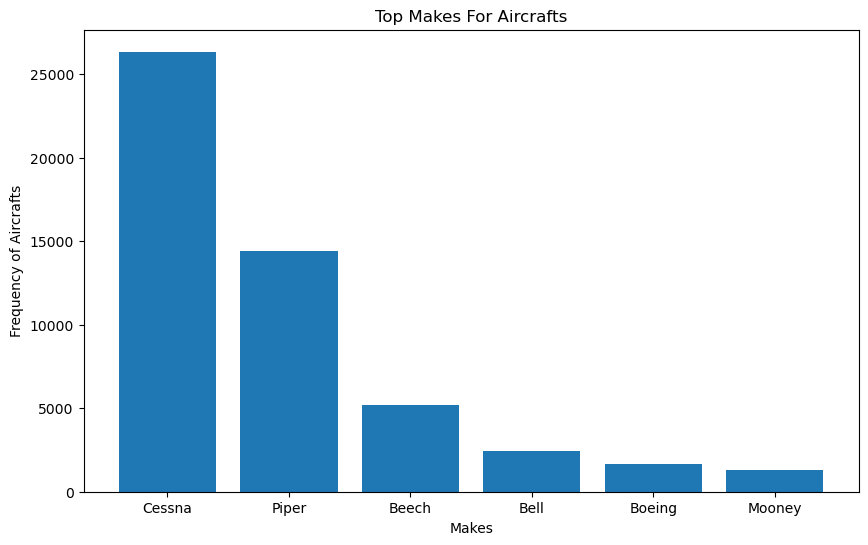

In [62]:
import matplotlib.pyplot as plt
fig, ax =plt.subplots(figsize=(10,6))
x=list(df["Make"].value_counts().index[:6])
y=list(df["Make"].value_counts().values[:6])
ax.bar(x,y)
ax.set_title("Top Makes For Aircrafts")
ax.set_xlabel("Makes")
ax.set_ylabel("Frequency of Aircrafts");

The top 5 makes are Cessna,Piper,Beech,Boeing and Bell

This visualization shows us that Cessna is the most commonly used type of Aircraft.

We can also show  a relationship between makes and  injuries either fatal,serious or minor.

In [66]:
df["Total.Fatal.Injuries"].value_counts()

Total.Fatal.Injuries
0.0      67875
1.0       8250
2.0       4735
3.0       1416
4.0        961
         ...  
97.0         1
31.0         1
35.0         1
228.0        1
90.0         1
Name: count, Length: 95, dtype: int64

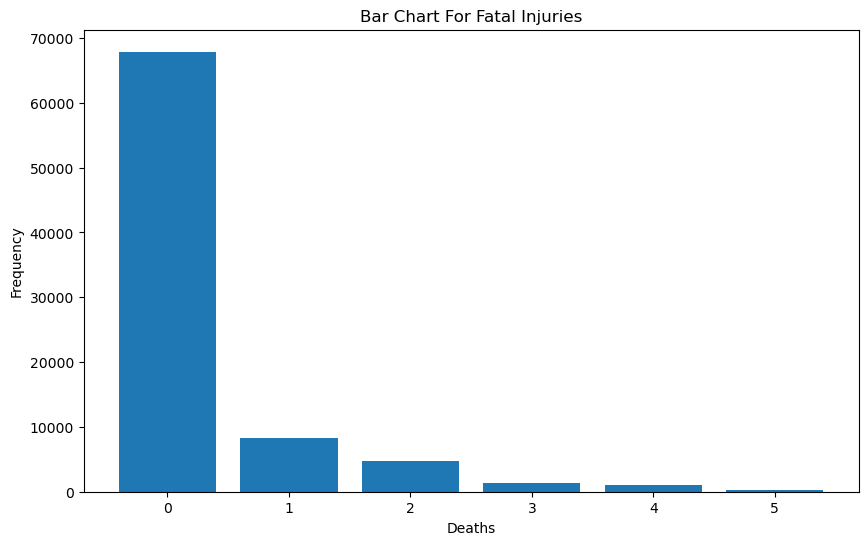

In [67]:
fig, ax =plt.subplots(figsize=(10,6))
x=list(df["Total.Fatal.Injuries"].value_counts().index[:6])
y=list(df["Total.Fatal.Injuries"].value_counts().values[:6])
ax.bar(x,y)
ax.set_title("Bar Chart For Fatal Injuries")
ax.set_xlabel("Deaths")
ax.set_ylabel("Frequency");

This visualization shows there is a huge number of survivors indicated by 0 deaths

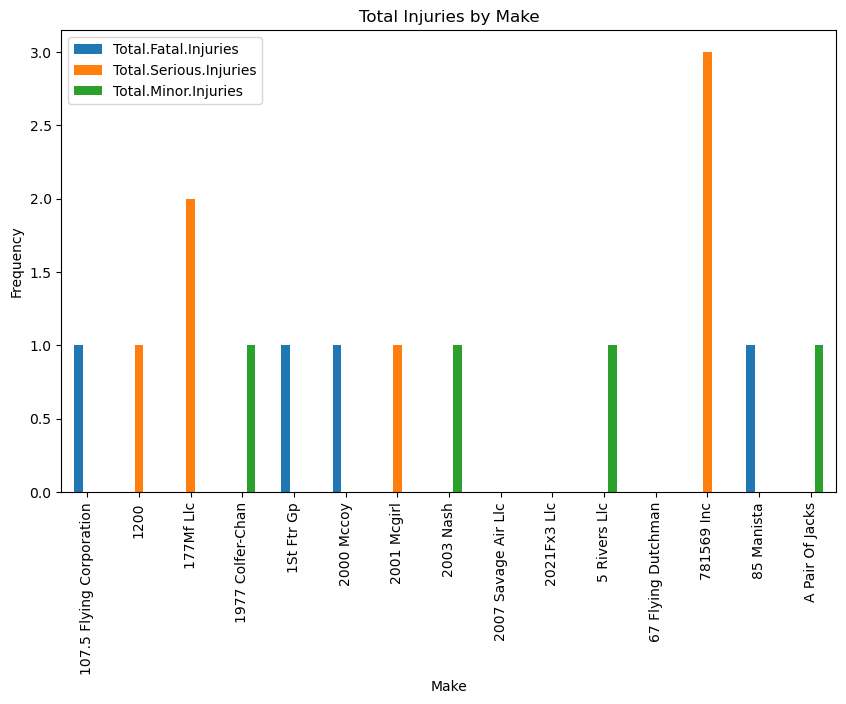

In [69]:
#slicing make with Total.Fatal.Injuries
df.groupby(["Make"])[["Total.Fatal.Injuries","Total.Serious.Injuries","Total.Minor.Injuries"]].sum().head(15).plot(kind = "bar",figsize = (10,6))
plt.title("Total Injuries by Make")
plt.xlabel("Make")
plt.ylabel("Frequency");

## Observation
* From the sample data we can see that largest number of fatalities is 1 across the makes ,only the number of Total serious injuries is higher for make 781569 Inc and 177Mf Llc.
  
  

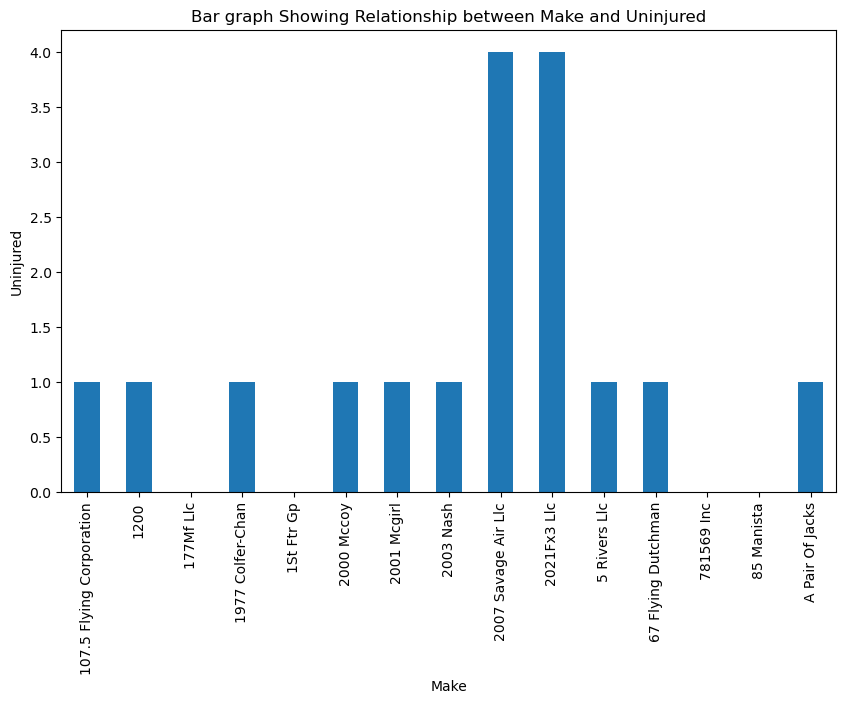

In [71]:
#slicing make and the Total Uninjured.
df.groupby(["Make"])["Total.Uninjured"].sum().head(15).plot(kind="bar",figsize=(10,6))
plt.title("Bar graph Showing Relationship between Make and Uninjured")
plt.xlabel("Make")
plt.ylabel("Uninjured");

## Observation

From this sample data the safest model is 2007 Savage Air llc and 2021Fx3 Llc.

In [74]:
df["Purpose.of.flight"].value_counts()

Purpose.of.flight
Personal                     58064
Instructional                10483
Aerial Application            4651
Business                      3947
Positioning                   1607
Other Work Use                1237
Ferry                          786
Aerial Observation             758
Public Aircraft                714
Executive/corporate            539
Flight Test                    392
Skydiving                      176
External Load                  116
Public Aircraft - Federal      104
Banner Tow                     101
Air Race show                   92
Public Aircraft - Local         71
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      52
Firefighting                    34
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: count, dtype: int64

## Question
* Here we want to answer the question to which type of flights are commonly taken by passengers.

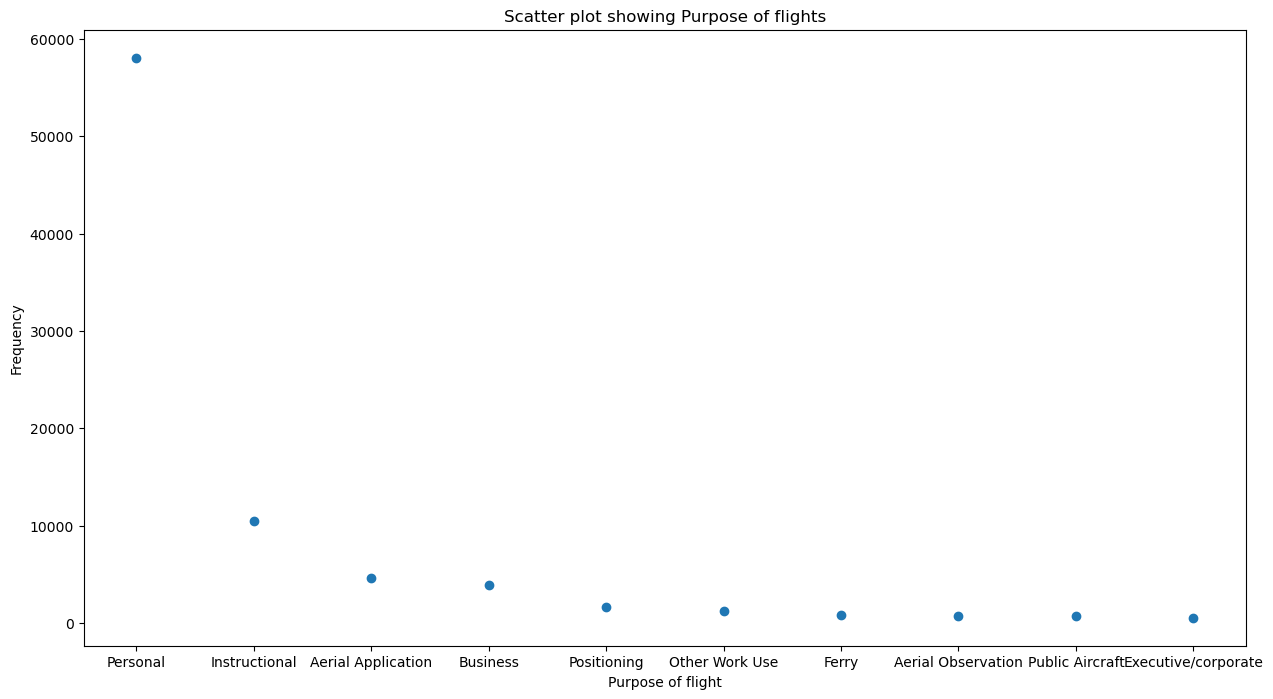

In [76]:
fig, ax =plt.subplots(figsize=(15,8))
x=list(df["Purpose.of.flight"].value_counts().index[:10])
y=list(df["Purpose.of.flight"].value_counts().values[:10])
ax.scatter(x,y)
ax.set_title("Scatter plot showing Purpose of flights")
ax.set_xlabel("Purpose of flight")
ax.set_ylabel("Frequency");

## Observation
* The visualization shows that most flights are personal so the shareholders should invest more in personal flights.
* The shareholders can also invest in flights dealing with Instructional,Aerial Application and Business just as a way to diversify since they're also a common reason for using aircrafts.

We can also show the relationship between purpose of flight and injuries.

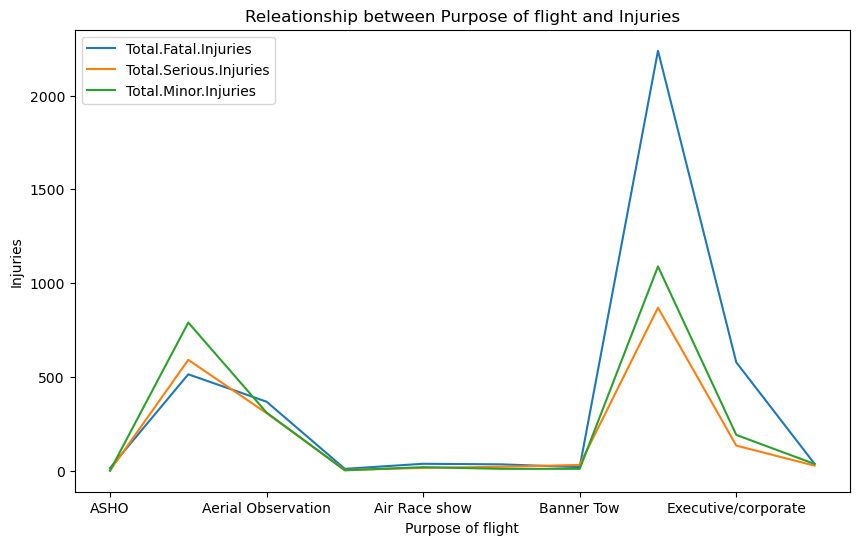

In [79]:
df.groupby(["Purpose.of.flight"])[["Total.Fatal.Injuries","Total.Serious.Injuries","Total.Minor.Injuries"]].sum().head(10).plot(kind = "line",figsize = (10,6))
plt.title("Releationship between Purpose of flight and Injuries")
plt.xlabel("Purpose of flight")
plt.ylabel("Injuries");

## Observation

This line graph shows that the most injuries either fatal, serious or minor occur in flights that involve Banner Tow.

Air race show has zero Total Fatal,serious and minor injuries

In [83]:
df["Weather.Condition"].value_counts()

Weather.Condition
VMC    77290
IMC     5956
UNK      823
Name: count, dtype: int64

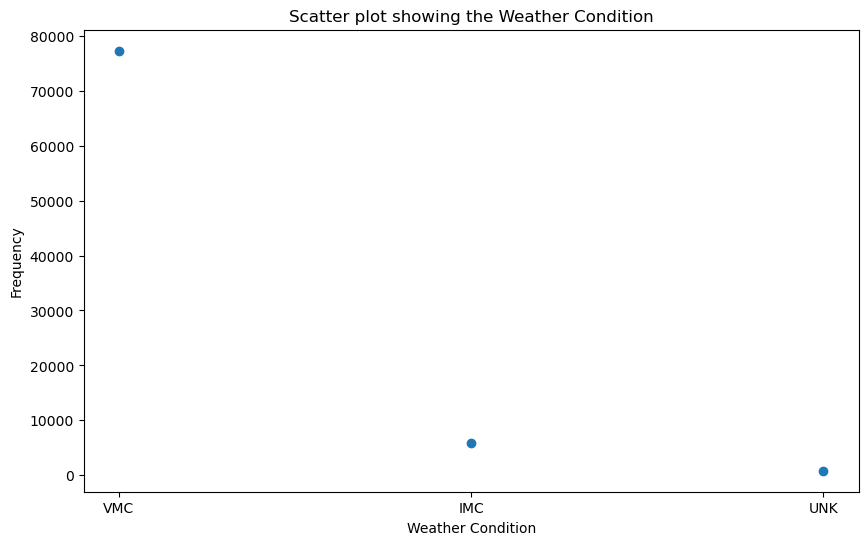

In [84]:
fig, ax =plt.subplots(figsize=(10,6))
x=list(df["Weather.Condition"].value_counts().index[:10])
y=list(df["Weather.Condition"].value_counts().values[:10])
ax.scatter(x,y)
ax.set_title("Scatter plot showing the Weather Condition")
ax.set_xlabel("Weather Condition")
ax.set_ylabel("Frequency");

## Observation
* VMC is the most common type of weather condition.
* VMC and IMC are external weather conditions during your flight where:
    * VMC are weather conditions in which pilots have sufficient visibility to fly aircraft relying on visual references.
    * IMC are weather conditions where the visilbilty has dropped down due to fog or flying through a crowd hence we make use of flight instrunments.

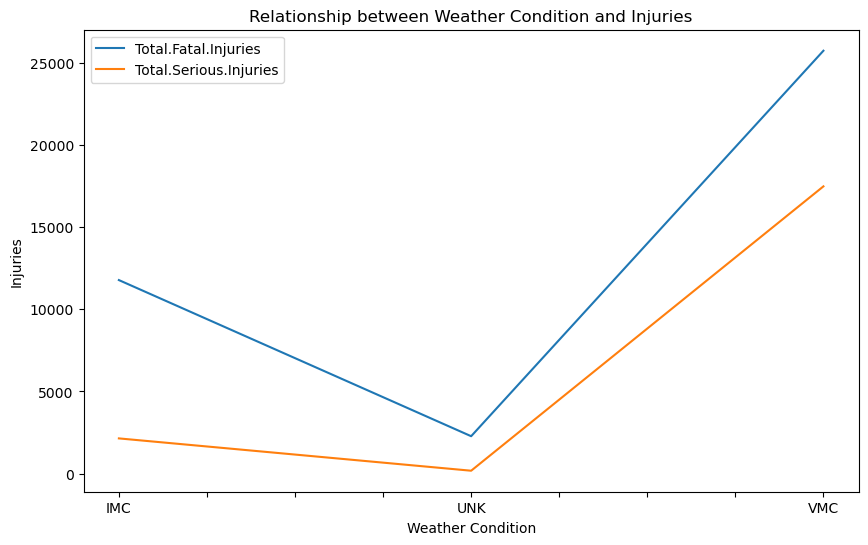

In [86]:
#slicing weather conditions
df.groupby(["Weather.Condition"])[["Total.Fatal.Injuries","Total.Serious.Injuries"]].sum().head(15).plot(kind="line",figsize=(10,6))
plt.title("Relationship between Weather Condition and Injuries")
plt.xlabel("Weather Condition")
plt.ylabel("Injuries");

## Observation

* The linegraph shows most of the injuries occur when there is visibility since VMC has a higher number of Total fatal and serious injuries than IMC.
*  We can conclude that majority of the accidents are due to human error rather than the weather ie fog,mist and a cloudy day.

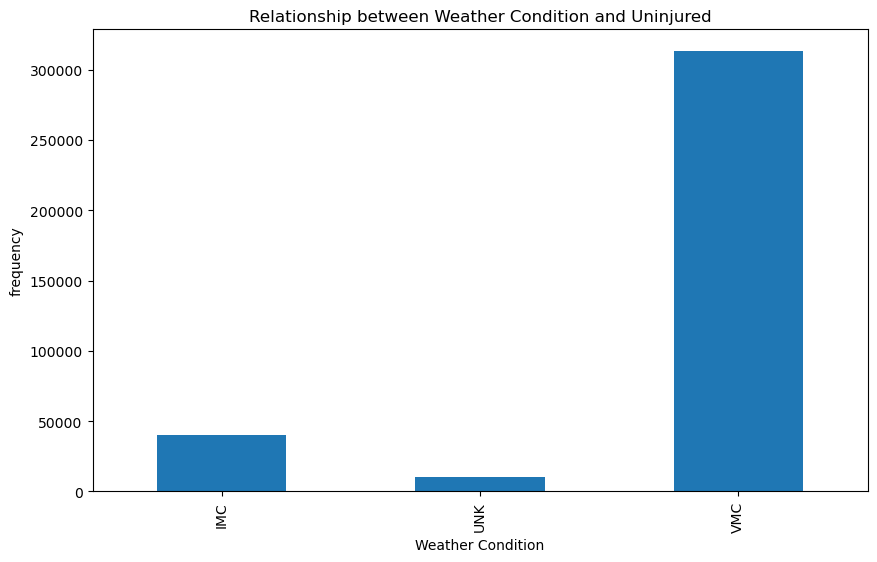

In [89]:
df.groupby(["Weather.Condition"])["Total.Uninjured"].sum().head(15).plot(kind="bar",figsize=(10,6))
plt.title("Relationship between Weather Condition and Uninjured")
plt.xlabel("Weather Condition")
plt.ylabel("frequency");

## Observation
* VMC has a higher number of Total uninjured than the rest of the weather conditions.
* When the weather is good the less the accidents.

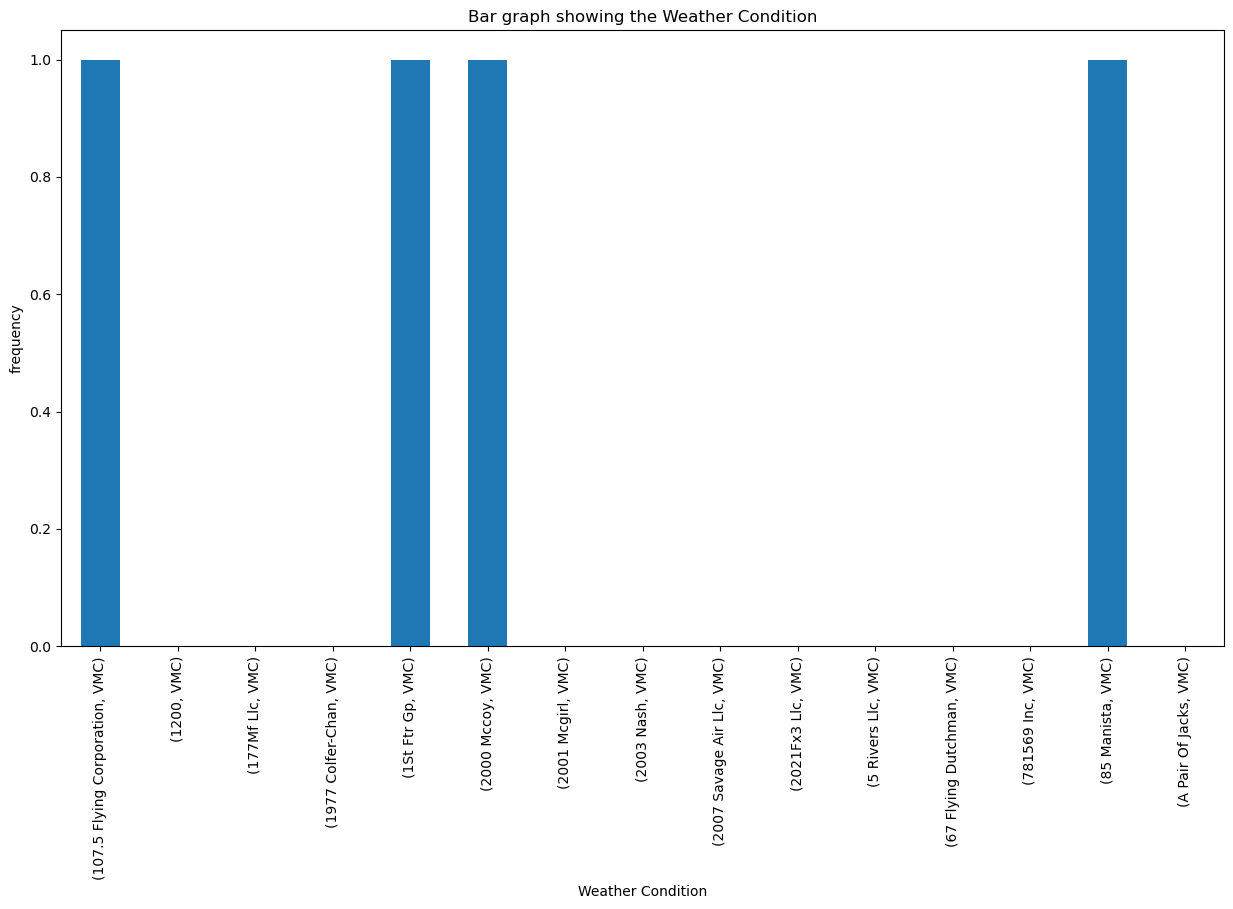

In [91]:
df.groupby(["Make","Weather.Condition"])["Total.Fatal.Injuries"].sum().head(15).plot(kind="bar",figsize=(15,8))
plt.title("Bar graph showing the Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("frequency");

In [92]:
#we can create a sample dataset 
df1=df.head(20)
df1

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Stinson,108-3,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Piper,PA24-180,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Cessna,172M,Personal,3.0,0.0,0.0,1.0,IMC
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Rockwell,112,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Cessna,501,Personal,1.0,2.0,0.0,0.0,VMC
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Mcdonnell Douglas,DC9,Personal,0.0,0.0,1.0,44.0,VMC
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal(4),Cessna,180,Personal,4.0,0.0,0.0,0.0,IMC
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Cessna,140,Personal,0.0,0.0,0.0,2.0,VMC
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Cessna,401B,Business,0.0,0.0,0.0,2.0,IMC
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,Non-Fatal,North American,NAVION L-17B,Personal,0.0,0.0,3.0,0.0,IMC


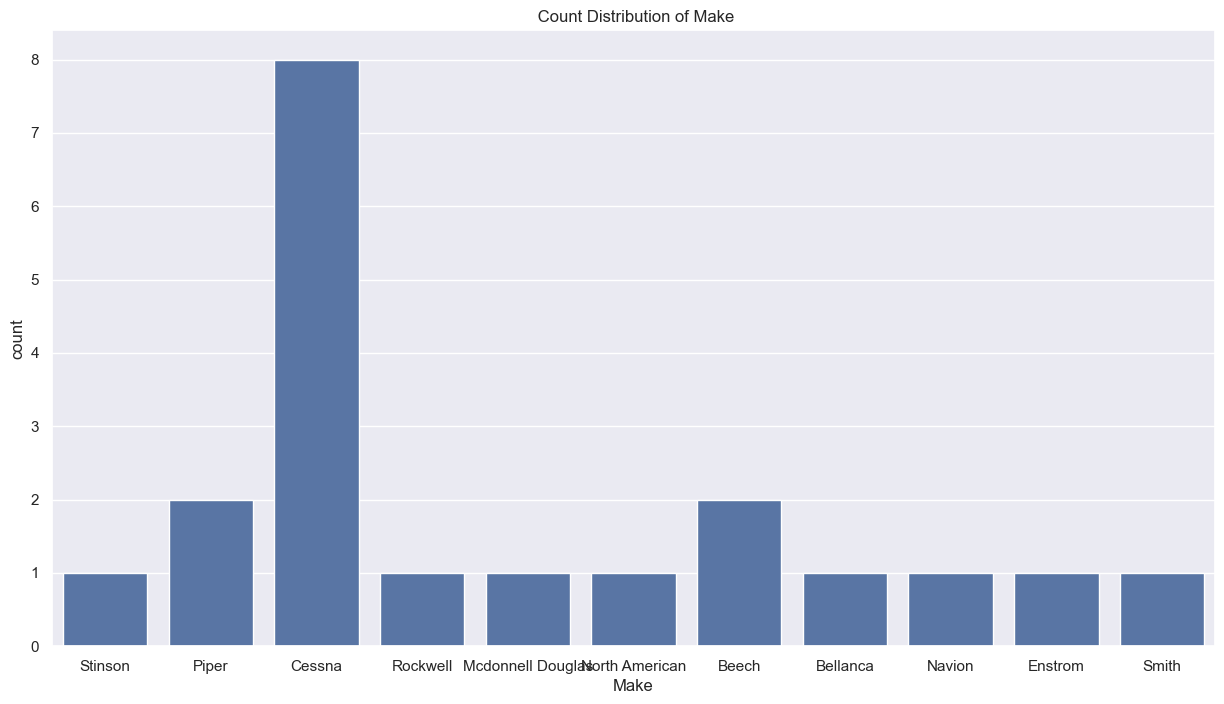

In [93]:
sns.set(rc={"figure.figsize":(15, 8)})
ax = sns.countplot(data = df1, x="Make")
ax.set_title(" Count Distribution of Make");

## Observation

From seaborn we can see Cessna has the highest count of makes from the sample data which is also true from our original data.

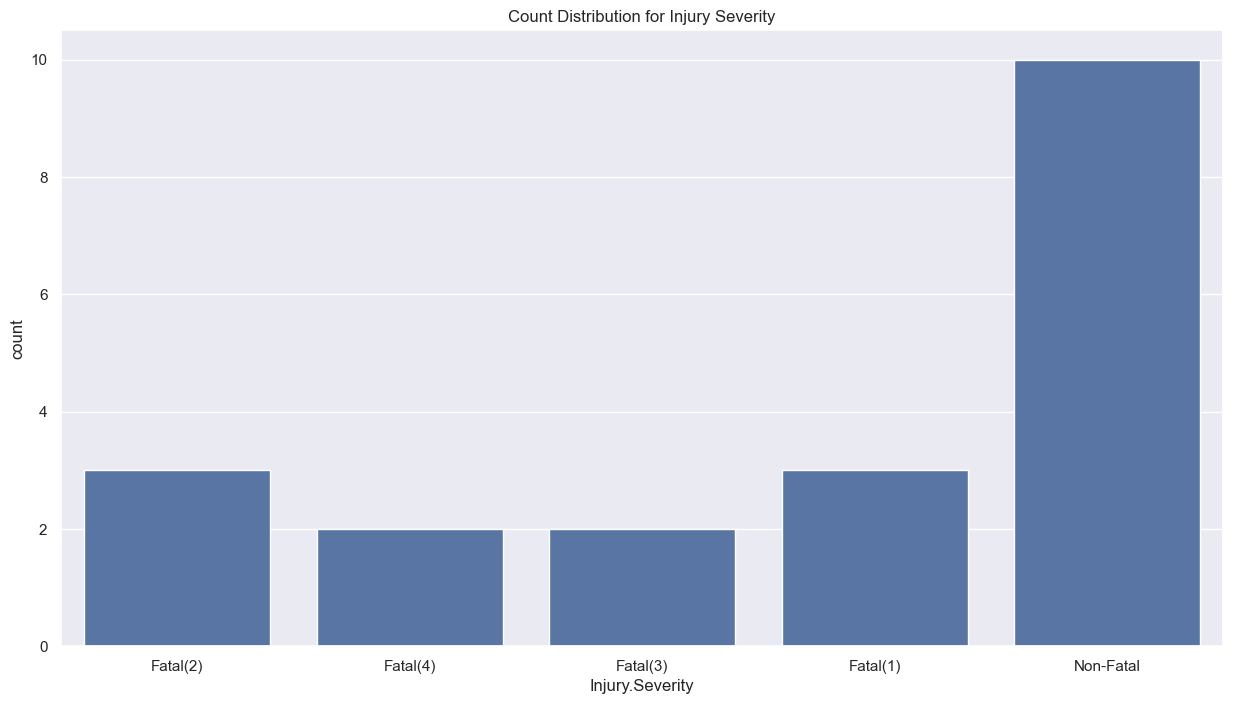

In [96]:
#for model
sns.set(rc={"figure.figsize":(15,8)})
ax=sns.countplot(data=df1, x="Injury.Severity")
ax.set_title("Count Distribution for Injury Severity");

## Observation

Majority of the injuries suffered were non-fatal.

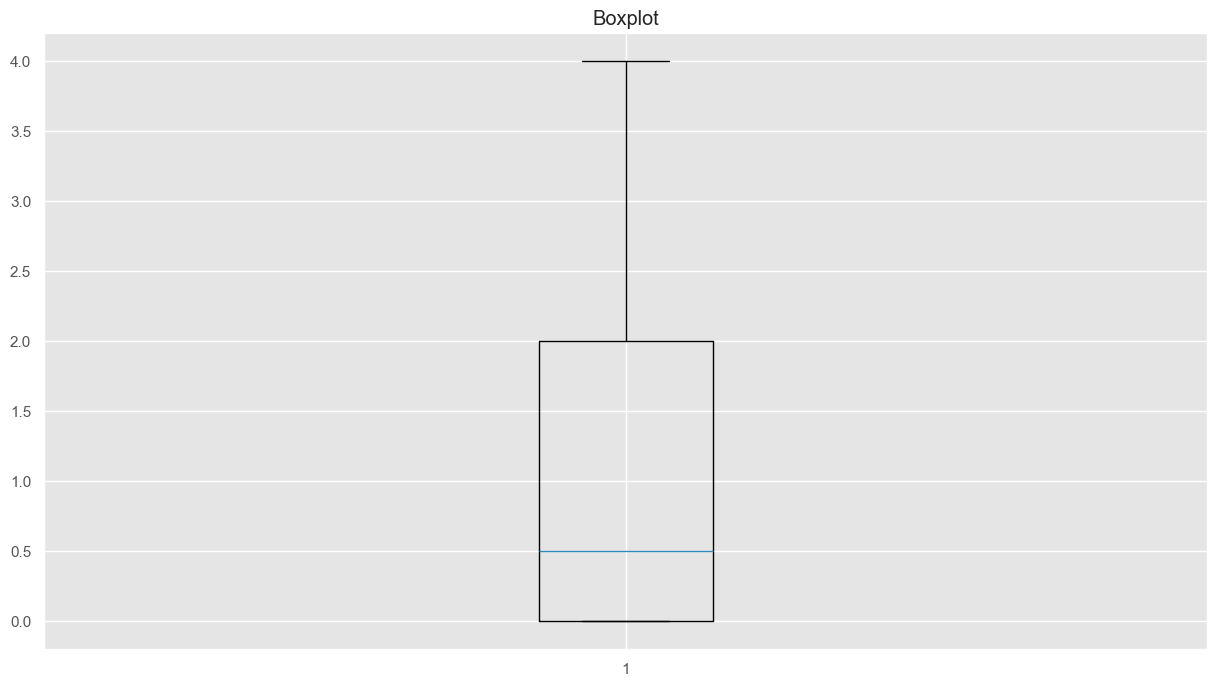

In [99]:
plt.style.use("ggplot")
x=df1["Total.Fatal.Injuries"]
plt.boxplot(x)
plt.title("Boxplot")
plt.show()


## Observation
*  For the sample data we can see 4 as the maximum value and 0 as the minimum value in Total fatal injuries.
* The median is denoted by the blue line which is at 0.5.
* The IQR is displayed by the box.
* They're no outliers in this sample data

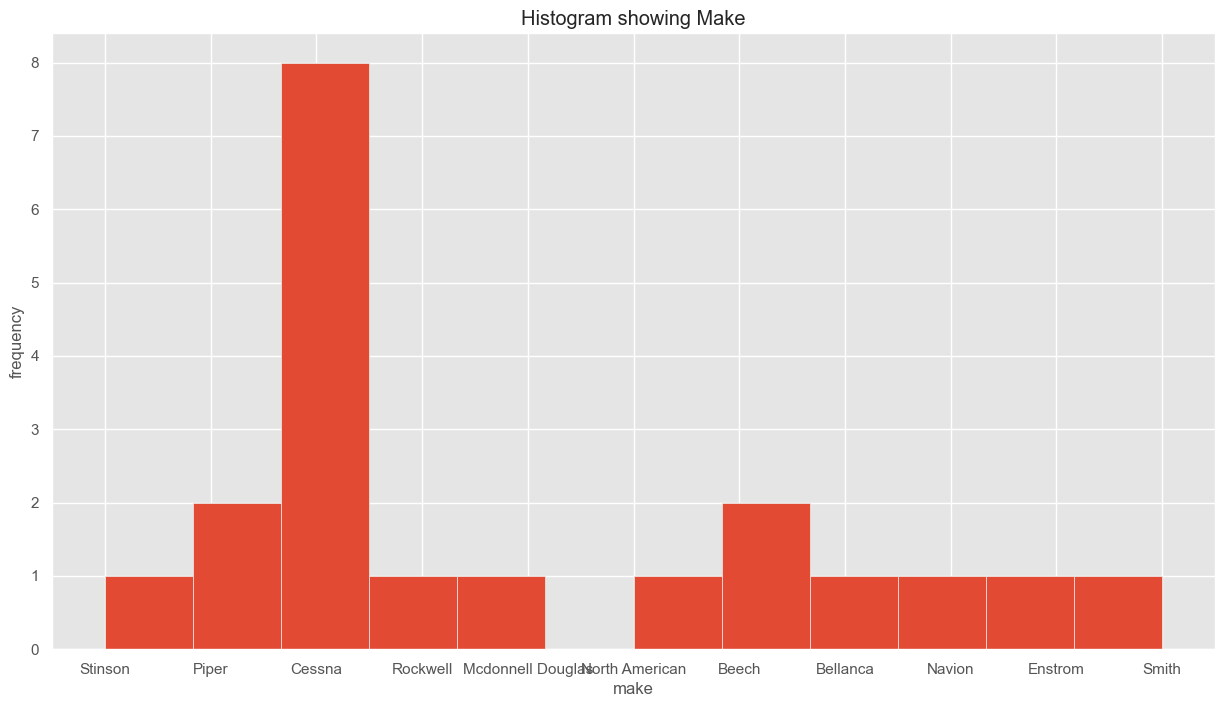

In [101]:
#plotting a histogram
x=df1["Make"]
plt.hist(x,bins=12)
plt.title("Histogram showing Make")
plt.xlabel("make")
plt.ylabel("frequency")
plt.show()

<Axes: >

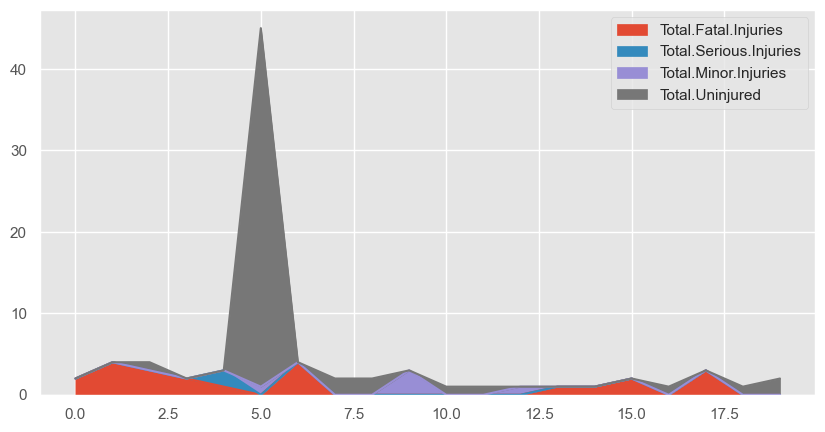

In [102]:
df1.plot.area(figsize= (10,5))

In [103]:
#to download the modified data 
df.to_csv("modified_aviationdata.csv",encoding="latin-1", index=False)
print(df.shape)

(84069, 15)


## Conclusion
* The most common type of aircraft used for travel is Cessna.
* The most common reason for travel is personal flights.
* The weather condition mostly responsible for accidents or fatal injures is VMC.
* Most accidents are due to human error since IMC has less number of Total fatal and serious injuries compared to VMC.
* Majority of the the Injuries are non-fatal.